<a href="https://colab.research.google.com/github/kiranmuloor/DataScience/blob/master/CNN/keras_cats_dogs_convnet_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Keras Model with Image Augmentation and Dropout to reduce overfitting
from keras import layers
from keras import models

In [11]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/train/"
validation_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/validation/"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [13]:
#Validation Data Set should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)
#Resize all images to 150x150
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 1248s 12s/step - loss: 0.6924 - acc: 0.5218 - val_loss: 0.6826 - val_acc: 0.5006
Epoch 2/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6820 - acc: 0.5650 - val_loss: 0.6879 - val_acc: 0.4890
Epoch 3/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6738 - acc: 0.5801 - val_loss: 0.7164 - val_acc: 0.5063
Epoch 4/100
100/100 [==============================] - 30s 301ms/step - loss: 0.6592 - acc: 0.6092 - val_loss: 0.7750 - val_acc: 0.5110
Epoch 5/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6388 - acc: 0.6326 - val_loss: 0.7623 - val_acc: 0.4968
Epoch 6/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6285 - acc: 0.6495 - val_loss: 0.7137 - val_acc: 0.5103
Epoch 7/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6059 - acc: 0.6752 - val_loss: 0.6653 - val_acc: 0.5013
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

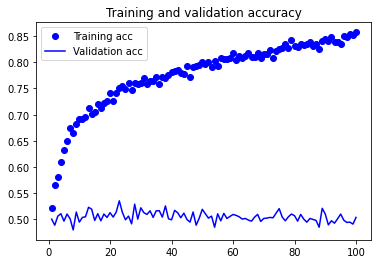

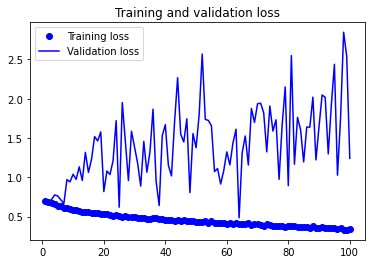

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()